<a href="https://colab.research.google.com/github/LucasVale98/Formacao_Machine_Learning/blob/main/Machine_Learning_Introducao_a_algoritmos_nao_supervisionados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **01. Conhecendo os Dados**

**Conhecendo o dataset**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
filmes = pd.read_csv("https://raw.githubusercontent.com/digantamisra98/KMeans-Movie-Ratings/master/movies.csv")

In [ ]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
filmes.columns = ["filme_id", "titulo", "generos"]

In [ ]:
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**Extraindo os dummies**

In [ ]:
filmes["generos"]

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9120                        Adventure|Drama|Romance
9121                Action|Adventure|Fantasy|Sci-Fi
9122                                    Documentary
9123                                         Comedy
9124                                    Documentary
Name: generos, Length: 9125, dtype: object

In [ ]:
generos = filmes["generos"].str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Escalando os dados**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
generos_esclados = scaler.fit_transform(generos)
generos_esclados

array([[-0.04445786, -0.45147077,  2.67753678, ..., -0.48350286,
        -0.204706  , -0.13695357],
       [-0.04445786, -0.45147077,  2.67753678, ..., -0.48350286,
        -0.204706  , -0.13695357],
       [-0.04445786, -0.45147077, -0.3734776 , ..., -0.48350286,
        -0.204706  , -0.13695357],
       ...,
       [-0.04445786, -0.45147077, -0.3734776 , ..., -0.48350286,
        -0.204706  , -0.13695357],
       [-0.04445786, -0.45147077, -0.3734776 , ..., -0.48350286,
        -0.204706  , -0.13695357],
       [-0.04445786, -0.45147077, -0.3734776 , ..., -0.48350286,
        -0.204706  , -0.13695357]])

# **02. Começnado a agrupar**

**Conhecendo o KMeans**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
modelo = KMeans(n_clusters=3)
modelo.fit(generos_esclados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
print(f"Grupos {modelo.labels_}")

Grupos [0 0 2 ... 2 2 2]


**Entendendo como KMeans funciona**

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

# **03. Vendo os centroides**

**Visualizando os centroids**

In [ ]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.04445786  0.79864882  1.78553697  1.44892228  1.34707345 -0.10731077
  -0.27316015 -0.2317431  -0.69573146  1.1414912  -0.09964054 -0.23373953
   0.79935861  0.21951546 -0.10680218 -0.28291532  0.77070955 -0.10712637
  -0.14661391 -0.05858274]
 [-0.04445786 -0.18827206 -0.22935212 -0.21389094 -0.2208873  -0.30872768
   0.09027393 -0.2218564   1.01650842 -0.17581133  0.12743005 -0.21046252
  -0.11960502 -0.07599217  0.03456988  0.12443307 -0.20394473 -0.01213506
   0.14936432 -0.03380828]
 [ 0.06427384 -0.02909766 -0.28352542 -0.19839629 -0.1593249   0.38484675
  -0.01956209  0.32376156 -0.9468789  -0.1479714  -0.11490868  0.31137693
  -0.10762533  0.01965119 -0.00682046 -0.05554065 -0.00269454  0.04654292
 

In [ ]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.044458,0.798649,1.785537,1.448922,1.347073,-0.107311,-0.273160,-0.231743,-0.695731,1.141491,-0.099641,-0.233740,0.799359,0.219515,-0.106802,-0.282915,0.770710,-0.107126,-0.146614,-0.058583
1,-0.044458,-0.188272,-0.229352,-0.213891,-0.220887,-0.308728,0.090274,-0.221856,1.016508,-0.175811,0.127430,-0.210463,-0.119605,-0.075992,0.034570,0.124433,-0.203945,-0.012135,0.149364,-0.033808
2,0.064274,-0.029098,-0.283525,-0.198396,-0.159325,0.384847,-0.019562,0.323762,-0.946879,-0.147971,-0.114909,0.311377,-0.107625,0.019651,-0.006820,-0.055541,-0.002695,0.046543,-0.125583,0.056441


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fadb68a30d0>,
      dtype=object)

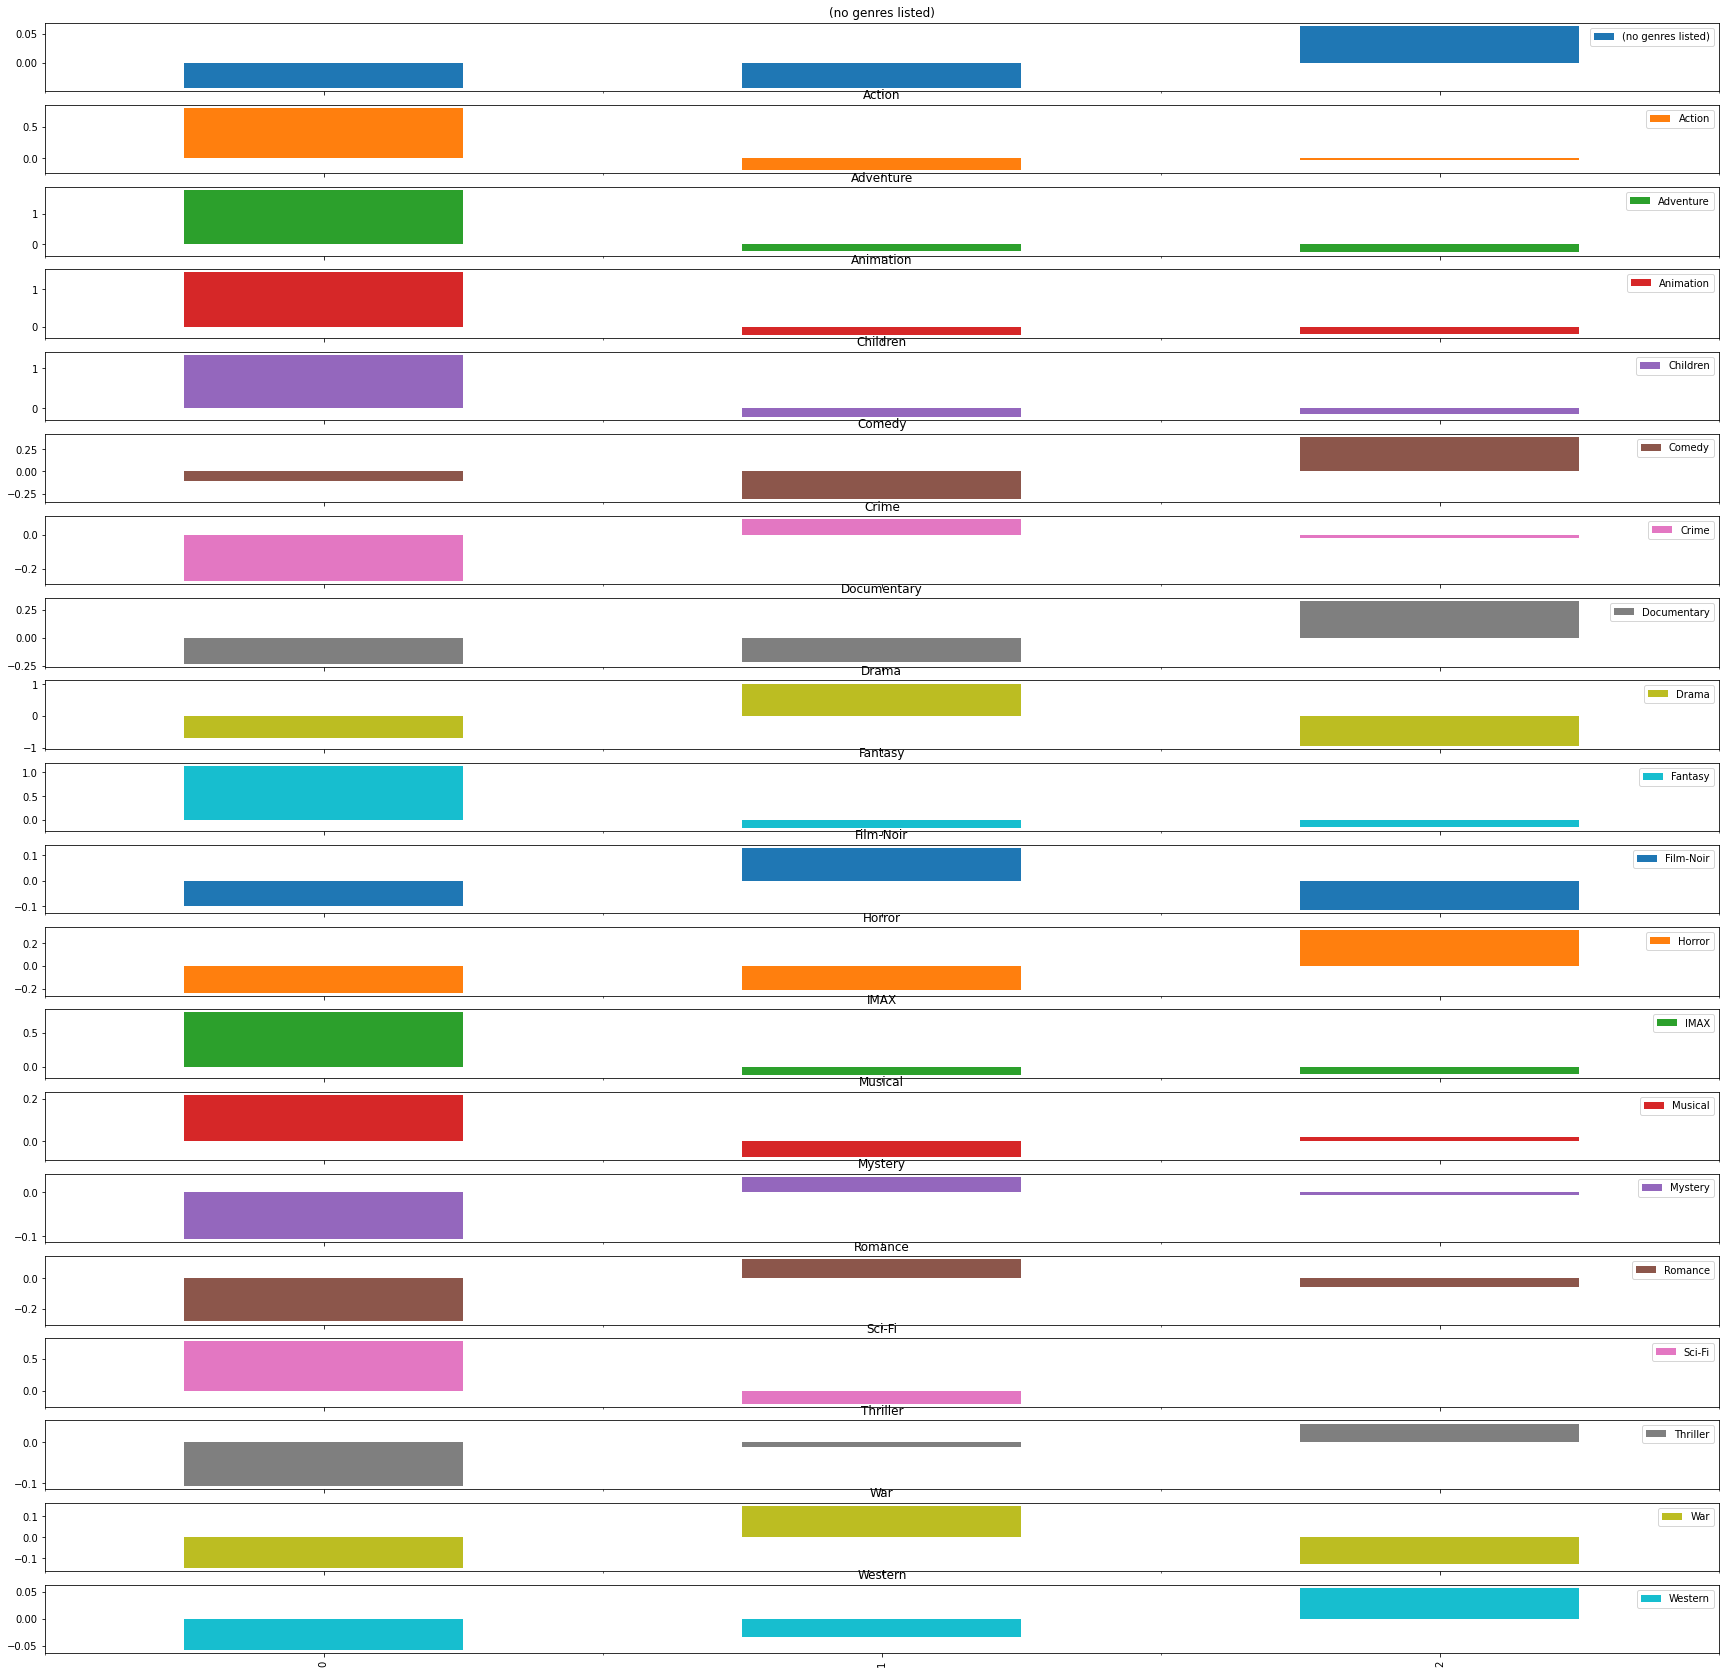

In [ ]:
grupos.plot.bar(subplots=True, figsize=(30,30))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fadb60a4550>,
      dtype=object)

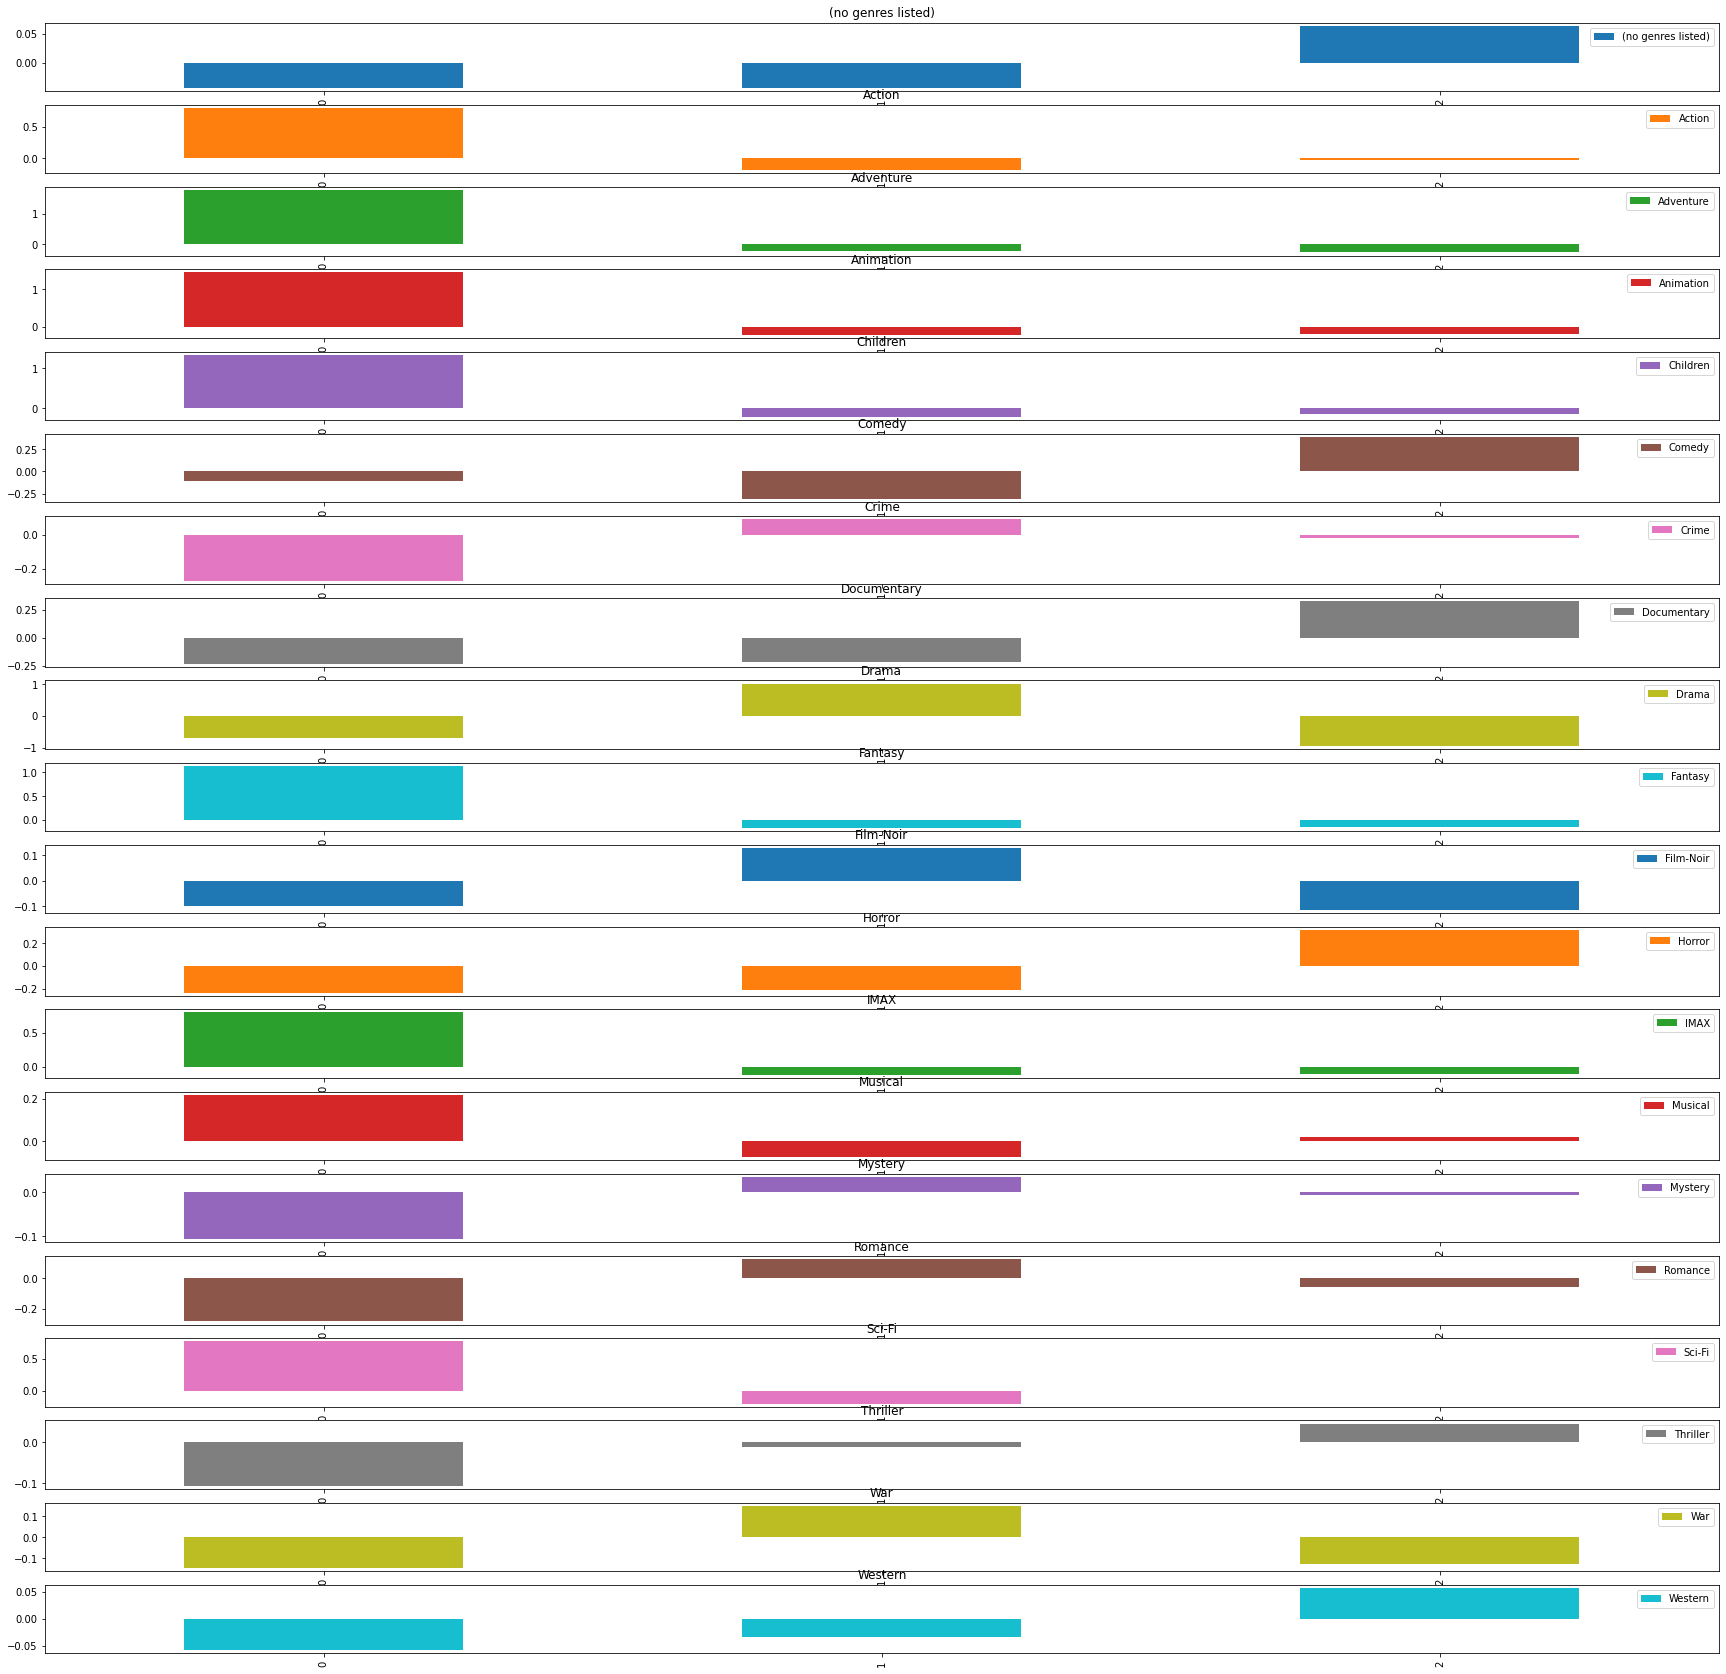

In [ ]:
grupos.plot.bar(subplots=True, figsize=(30,30), sharex=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fadb3f17b90>,
      dtype=object)

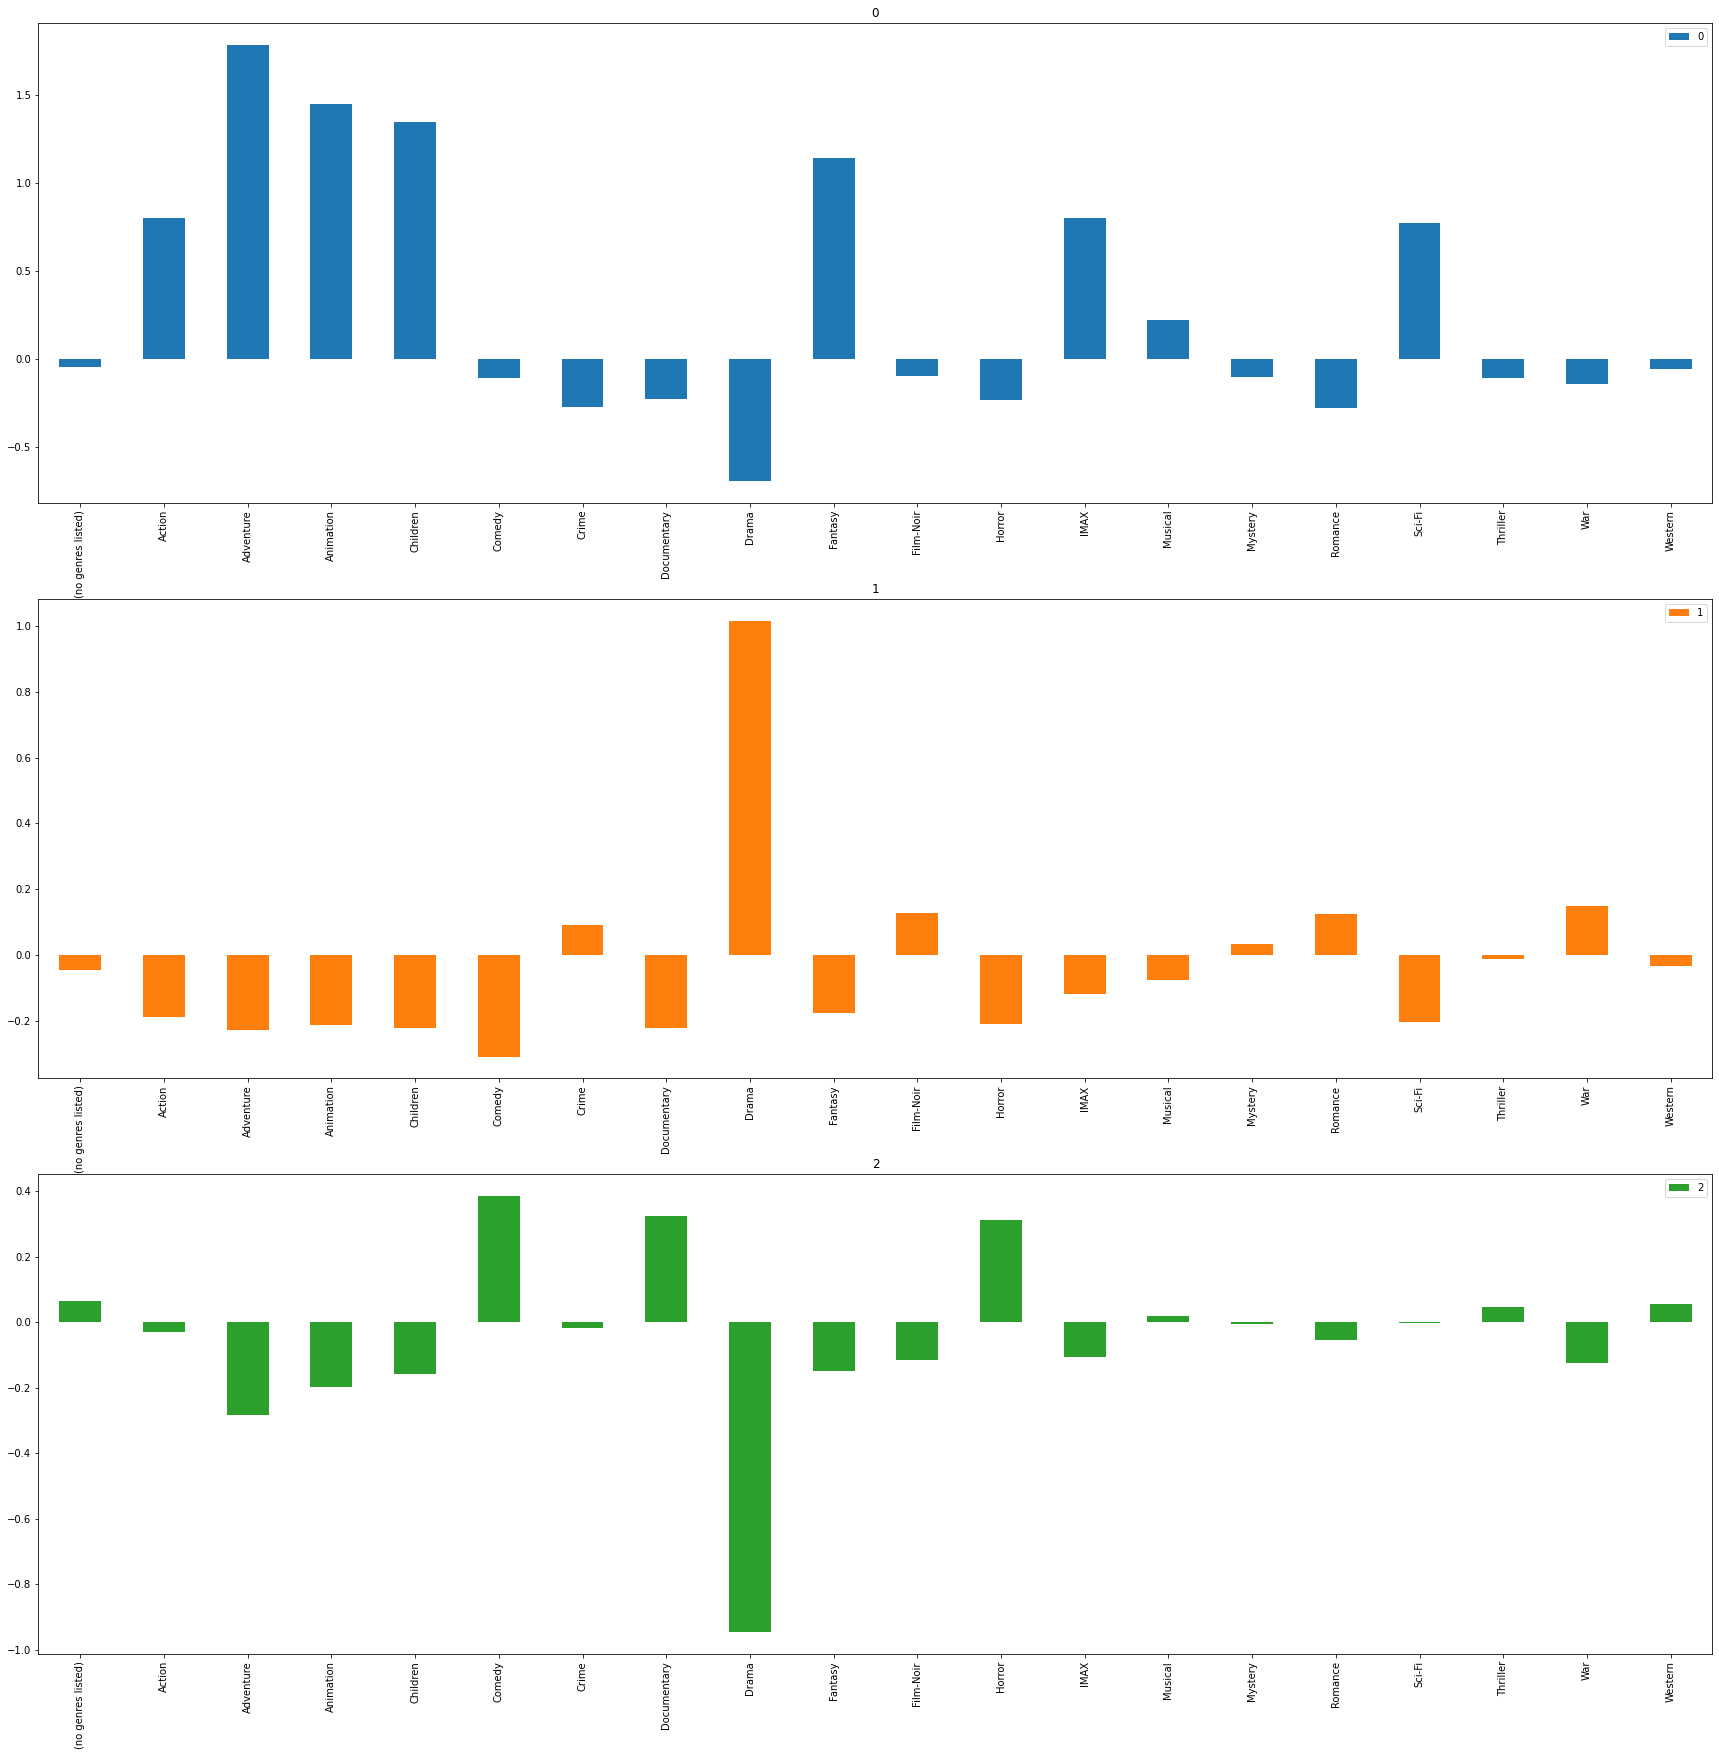

In [ ]:
grupos.transpose().plot.bar(subplots=True, 
                figsize=(30,30), 
                sharex=False,)

In [ ]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8377,104074,Percy Jackson: Sea of Monsters (2013),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
971,1215,Army of Darkness (1993),Action|Adventure|Comedy|Fantasy|Horror,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4085,5349,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3299,4133,Masters of the Universe (1987),Action|Adventure|Fantasy|Sci-Fi,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
8772,120799,Terminator Genisys (2015),Action|Adventure|Sci-Fi|Thriller,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
7785,86190,Hanna (2011),Action|Adventure|Mystery|Thriller,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
6670,52287,Meet the Robinsons (2007),Action|Adventure|Animation|Children|Comedy|Sci-Fi,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7076,63113,Quantum of Solace (2008),Action|Adventure|Thriller,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8089,95510,"Amazing Spider-Man, The (2012)",Action|Adventure|Sci-Fi|IMAX,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6307,41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


**Criando um gráfico com o seaborn**

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_esclados)
visualizacao

array([[-35.654266, -29.07353 ],
       [-14.341694, -22.772327],
       [ 56.29943 ,  -7.633868],
       ...,
       [  5.086611, -28.55992 ],
       [-31.646849,  -5.311481],
       [  5.946237, -26.547255]], dtype=float32)

In [ ]:
import seaborn as sns

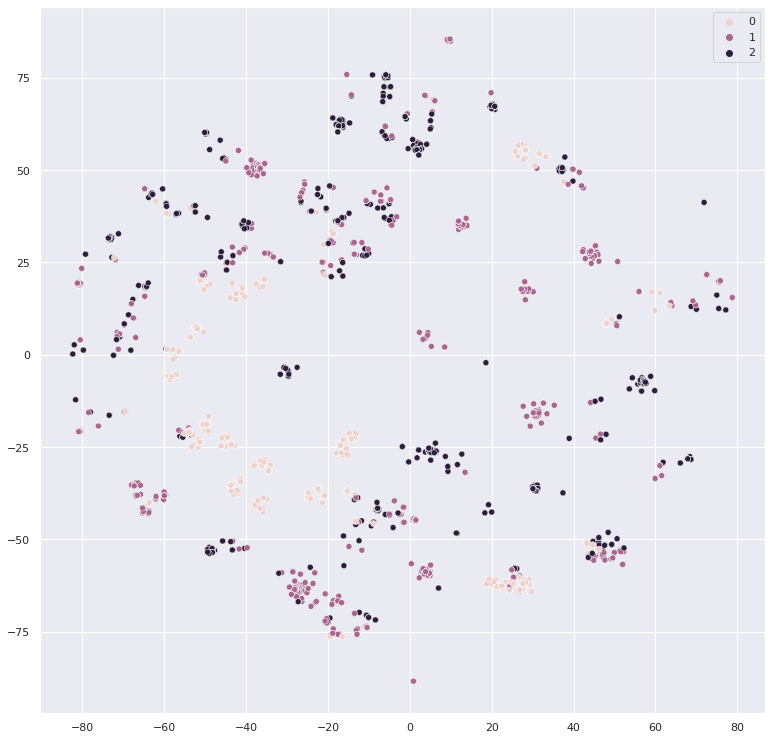

In [ ]:
sns.set(rc={"figure.figsize": (13, 13)})


sns.scatterplot(x=visualizacao[:,0],
                y=visualizacao[:,1],
                hue=modelo.labels_)

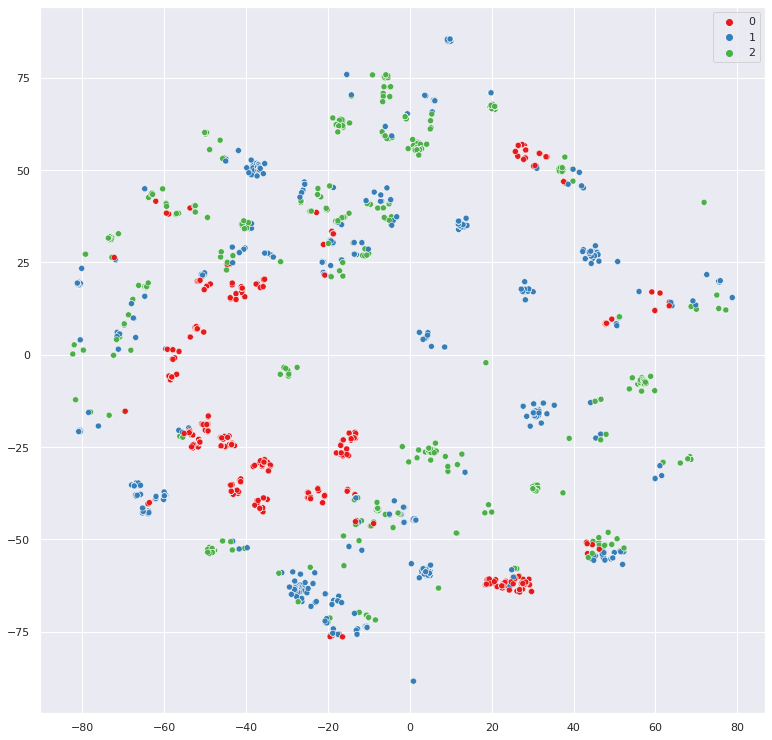

In [ ]:
sns.set(rc={"figure.figsize": (13, 13)})

sns.scatterplot(x=visualizacao[:,0],
                y=visualizacao[:,1],
                hue=modelo.labels_,
                palette=sns.color_palette("Set1", 3))

# **04. Escolhendo o número de grupos**

**Agrupando em 20 grupos**

In [ ]:
modelo = KMeans(n_clusters=20)
modelo.fit(generos_esclados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.044458,1.684220,1.954548,-0.051296,-0.261249,-0.400609,-0.282898,-0.239495,-0.701446,-0.039000,-0.121618,-0.261762,-0.130587,-0.212430,-0.231506,-0.438834,3.243681,0.000240,-0.204706,-0.136954
1,-0.044458,-0.451471,-0.245492,-0.226957,-0.261249,-0.755360,-0.370232,-0.239495,0.929138,-0.277857,-0.121618,-0.326081,-0.130587,-0.212430,-0.251539,-0.451471,-0.308292,-0.041523,-0.204706,-0.136954
2,-0.044458,-0.264351,-0.373478,-0.226957,3.827767,0.703751,-0.316350,-0.239495,-0.360559,0.606332,-0.121618,-0.286399,-0.130587,-0.212430,-0.127941,-0.217571,-0.121346,-0.483503,-0.204706,-0.136954
3,-0.044458,-0.331180,-0.327598,-0.157287,-0.261249,-0.692826,1.292395,-0.239495,0.276630,-0.248708,8.222471,-0.224042,-0.130587,-0.175439,0.733716,-0.250986,-0.228172,0.552543,-0.204706,-0.081024
4,22.493209,-0.451471,-0.373478,-0.226957,-0.261249,-0.755360,-0.370232,-0.239495,-0.957610,-0.277857,-0.121618,-0.326081,-0.130587,-0.212430,-0.251539,-0.451471,-0.308292,-0.483503,-0.204706,-0.136954


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fadb27307d0>,
      dtype=object)

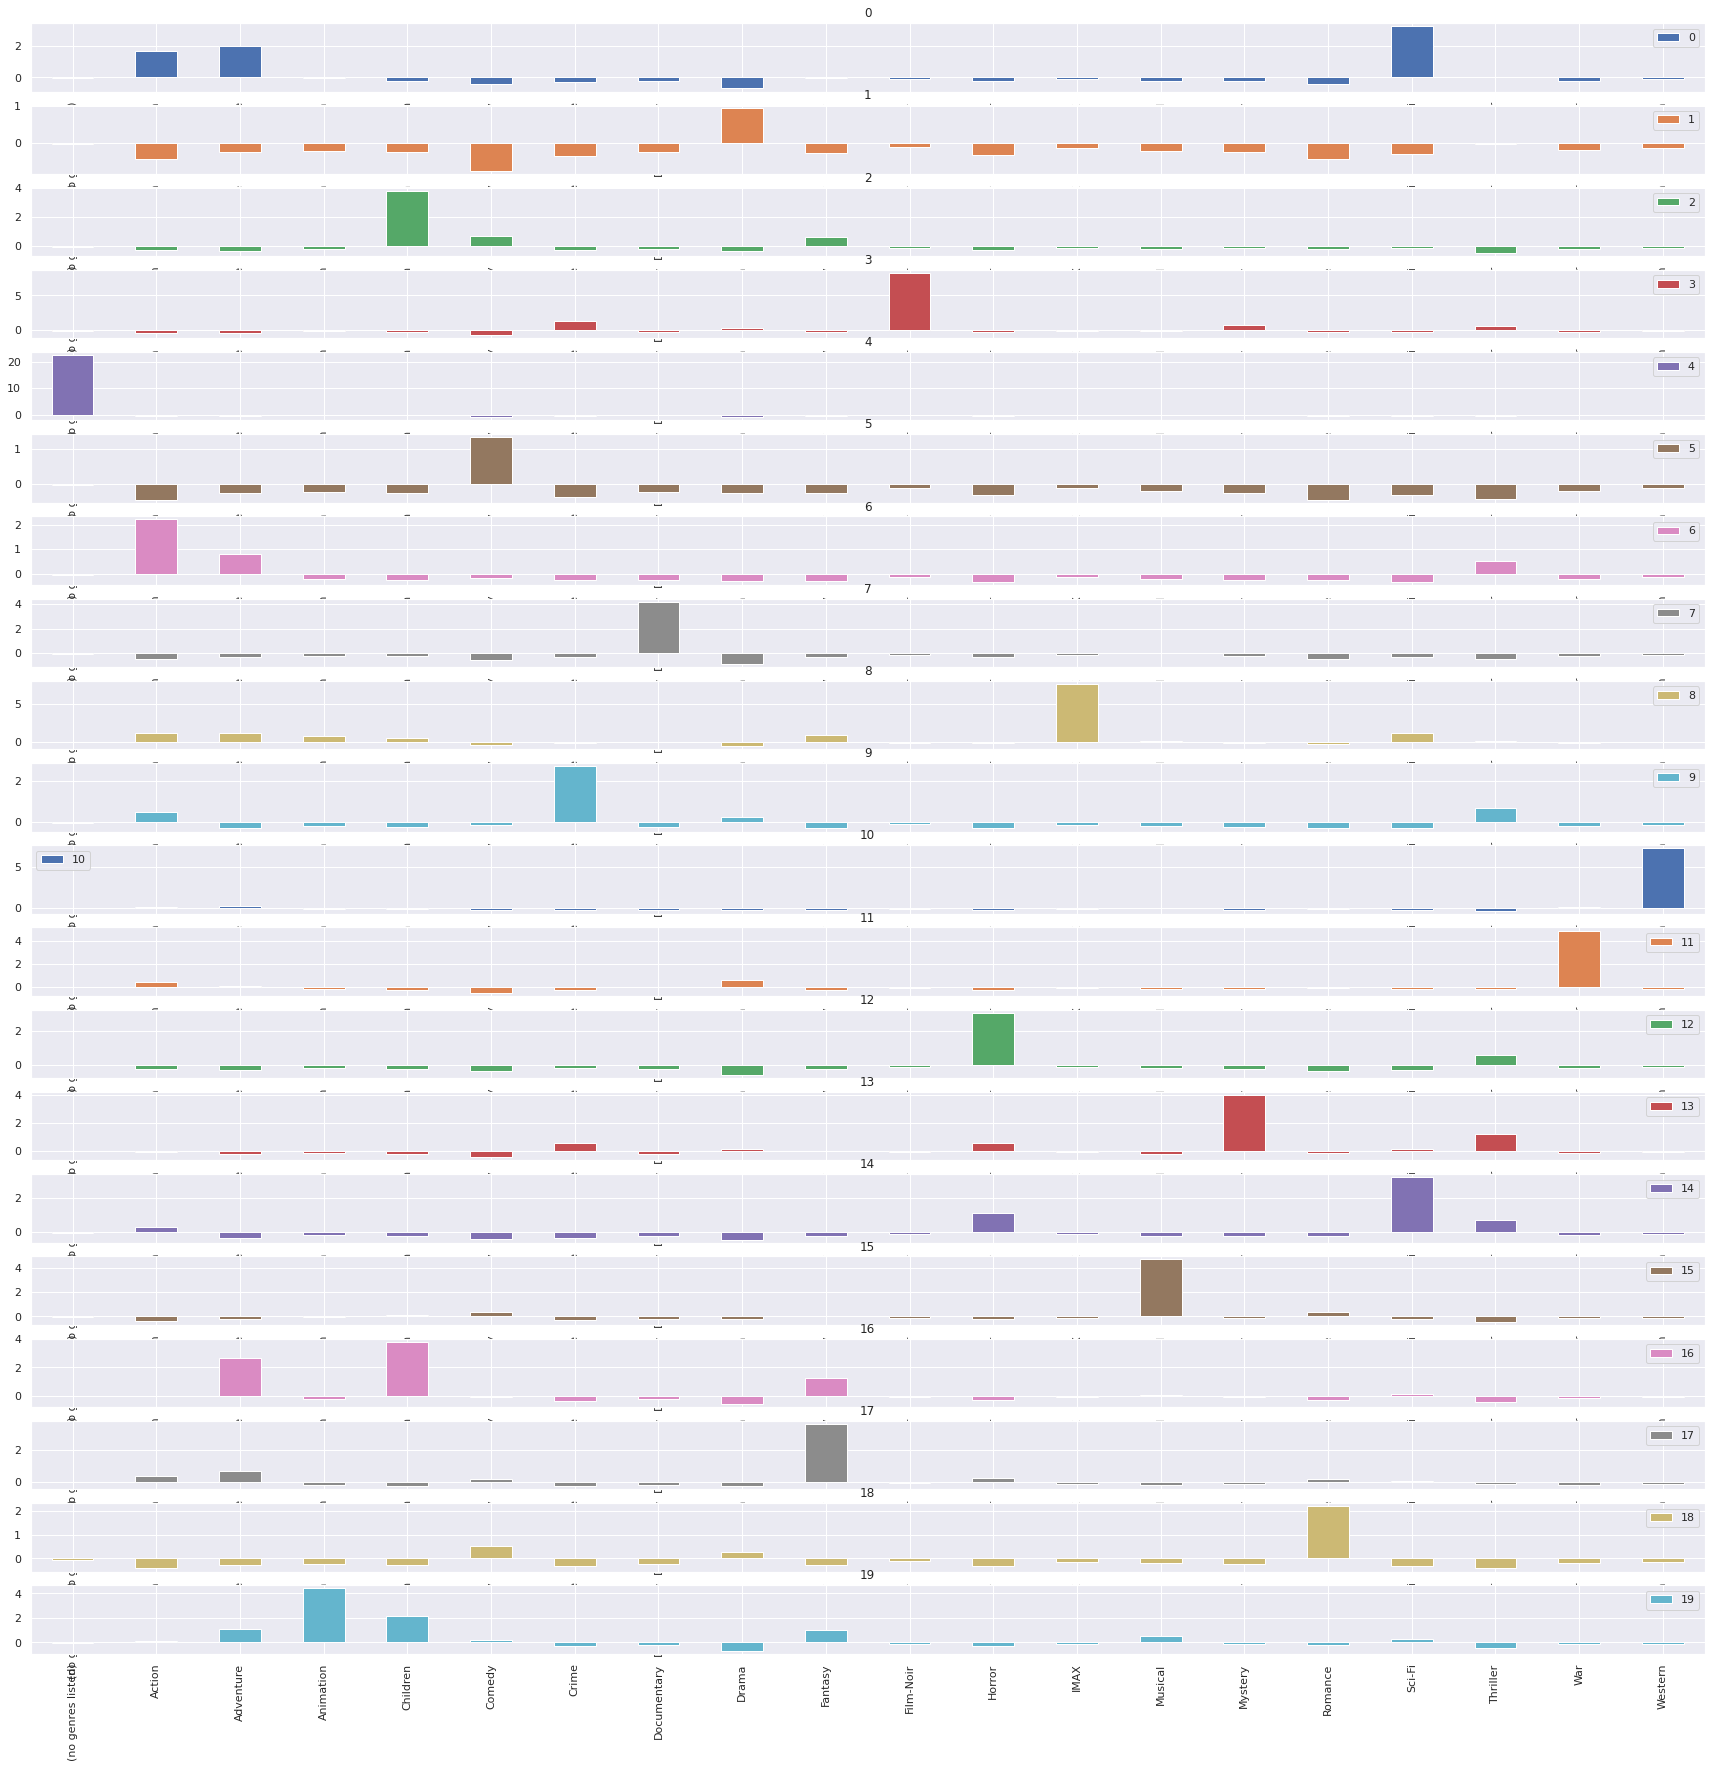

In [ ]:
grupos.transpose().plot.bar(subplots=True, 
                figsize=(30,30), 
                sharex=False,)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fadb1a2e5d0>,
      dtype=object)

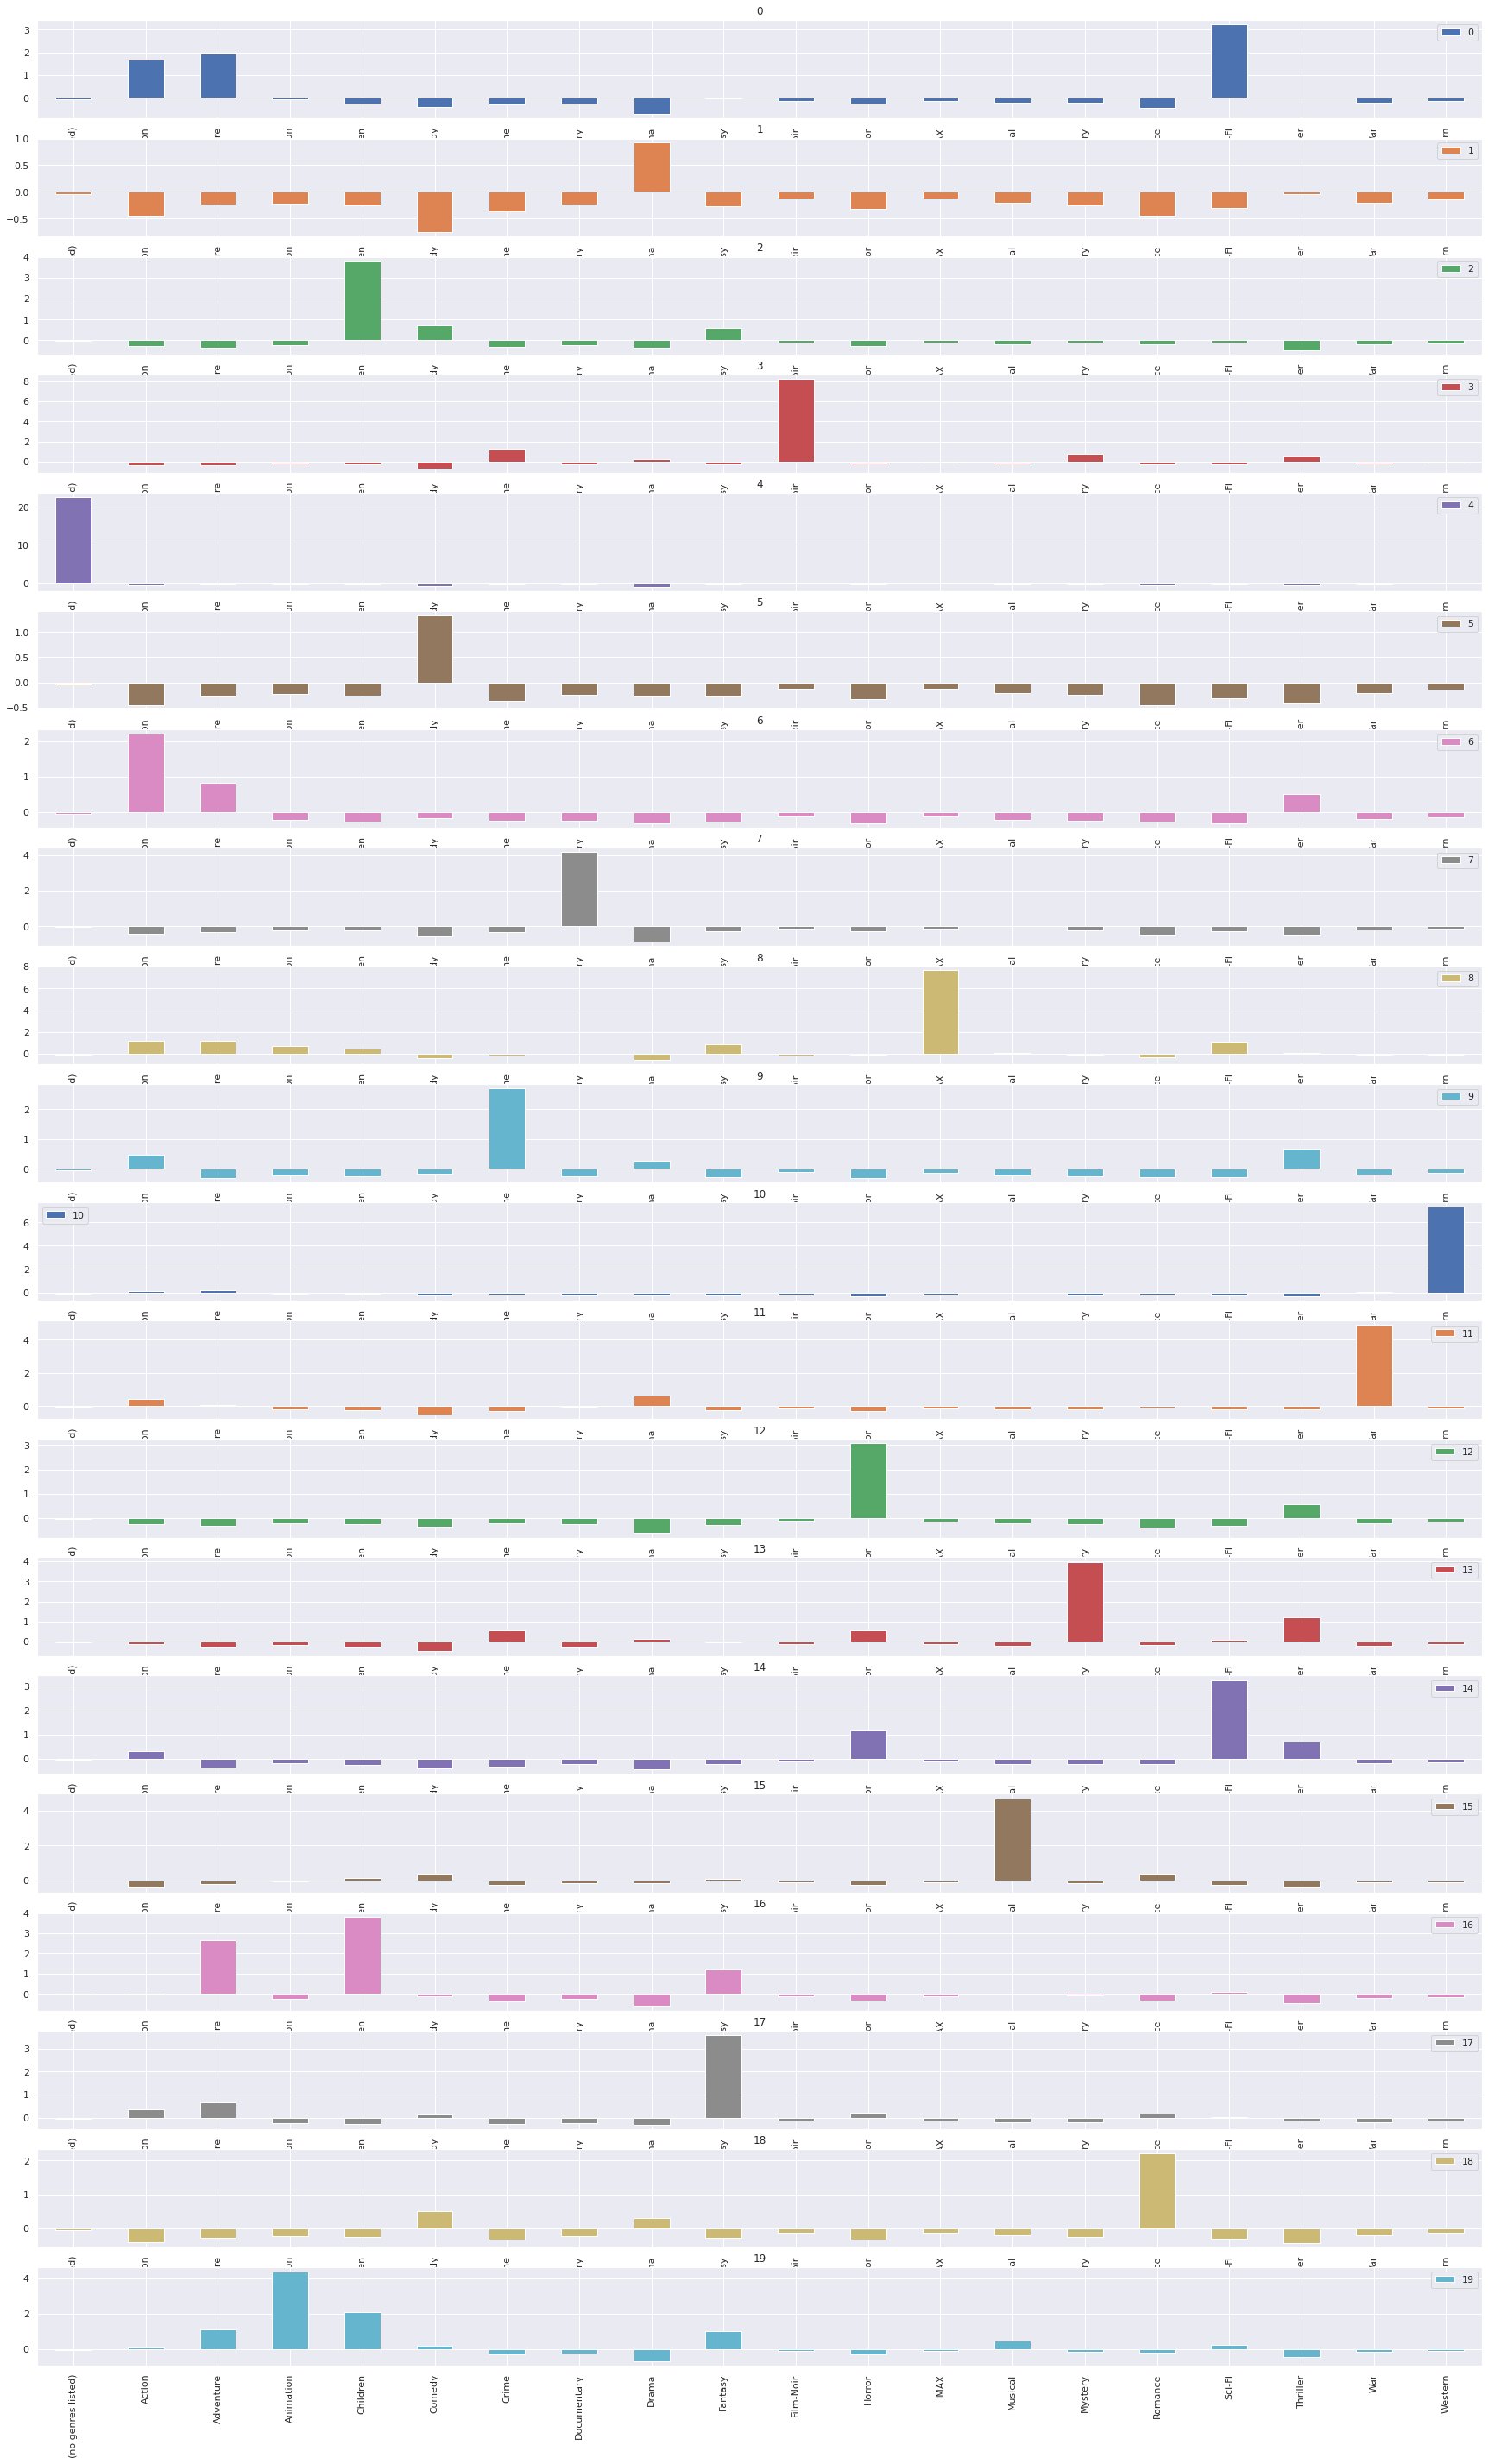

In [ ]:
grupos.transpose().plot.bar(subplots=True, 
                figsize=(30,50), 
                sharex=False,)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fadb0bdff10>,
      dtype=object)

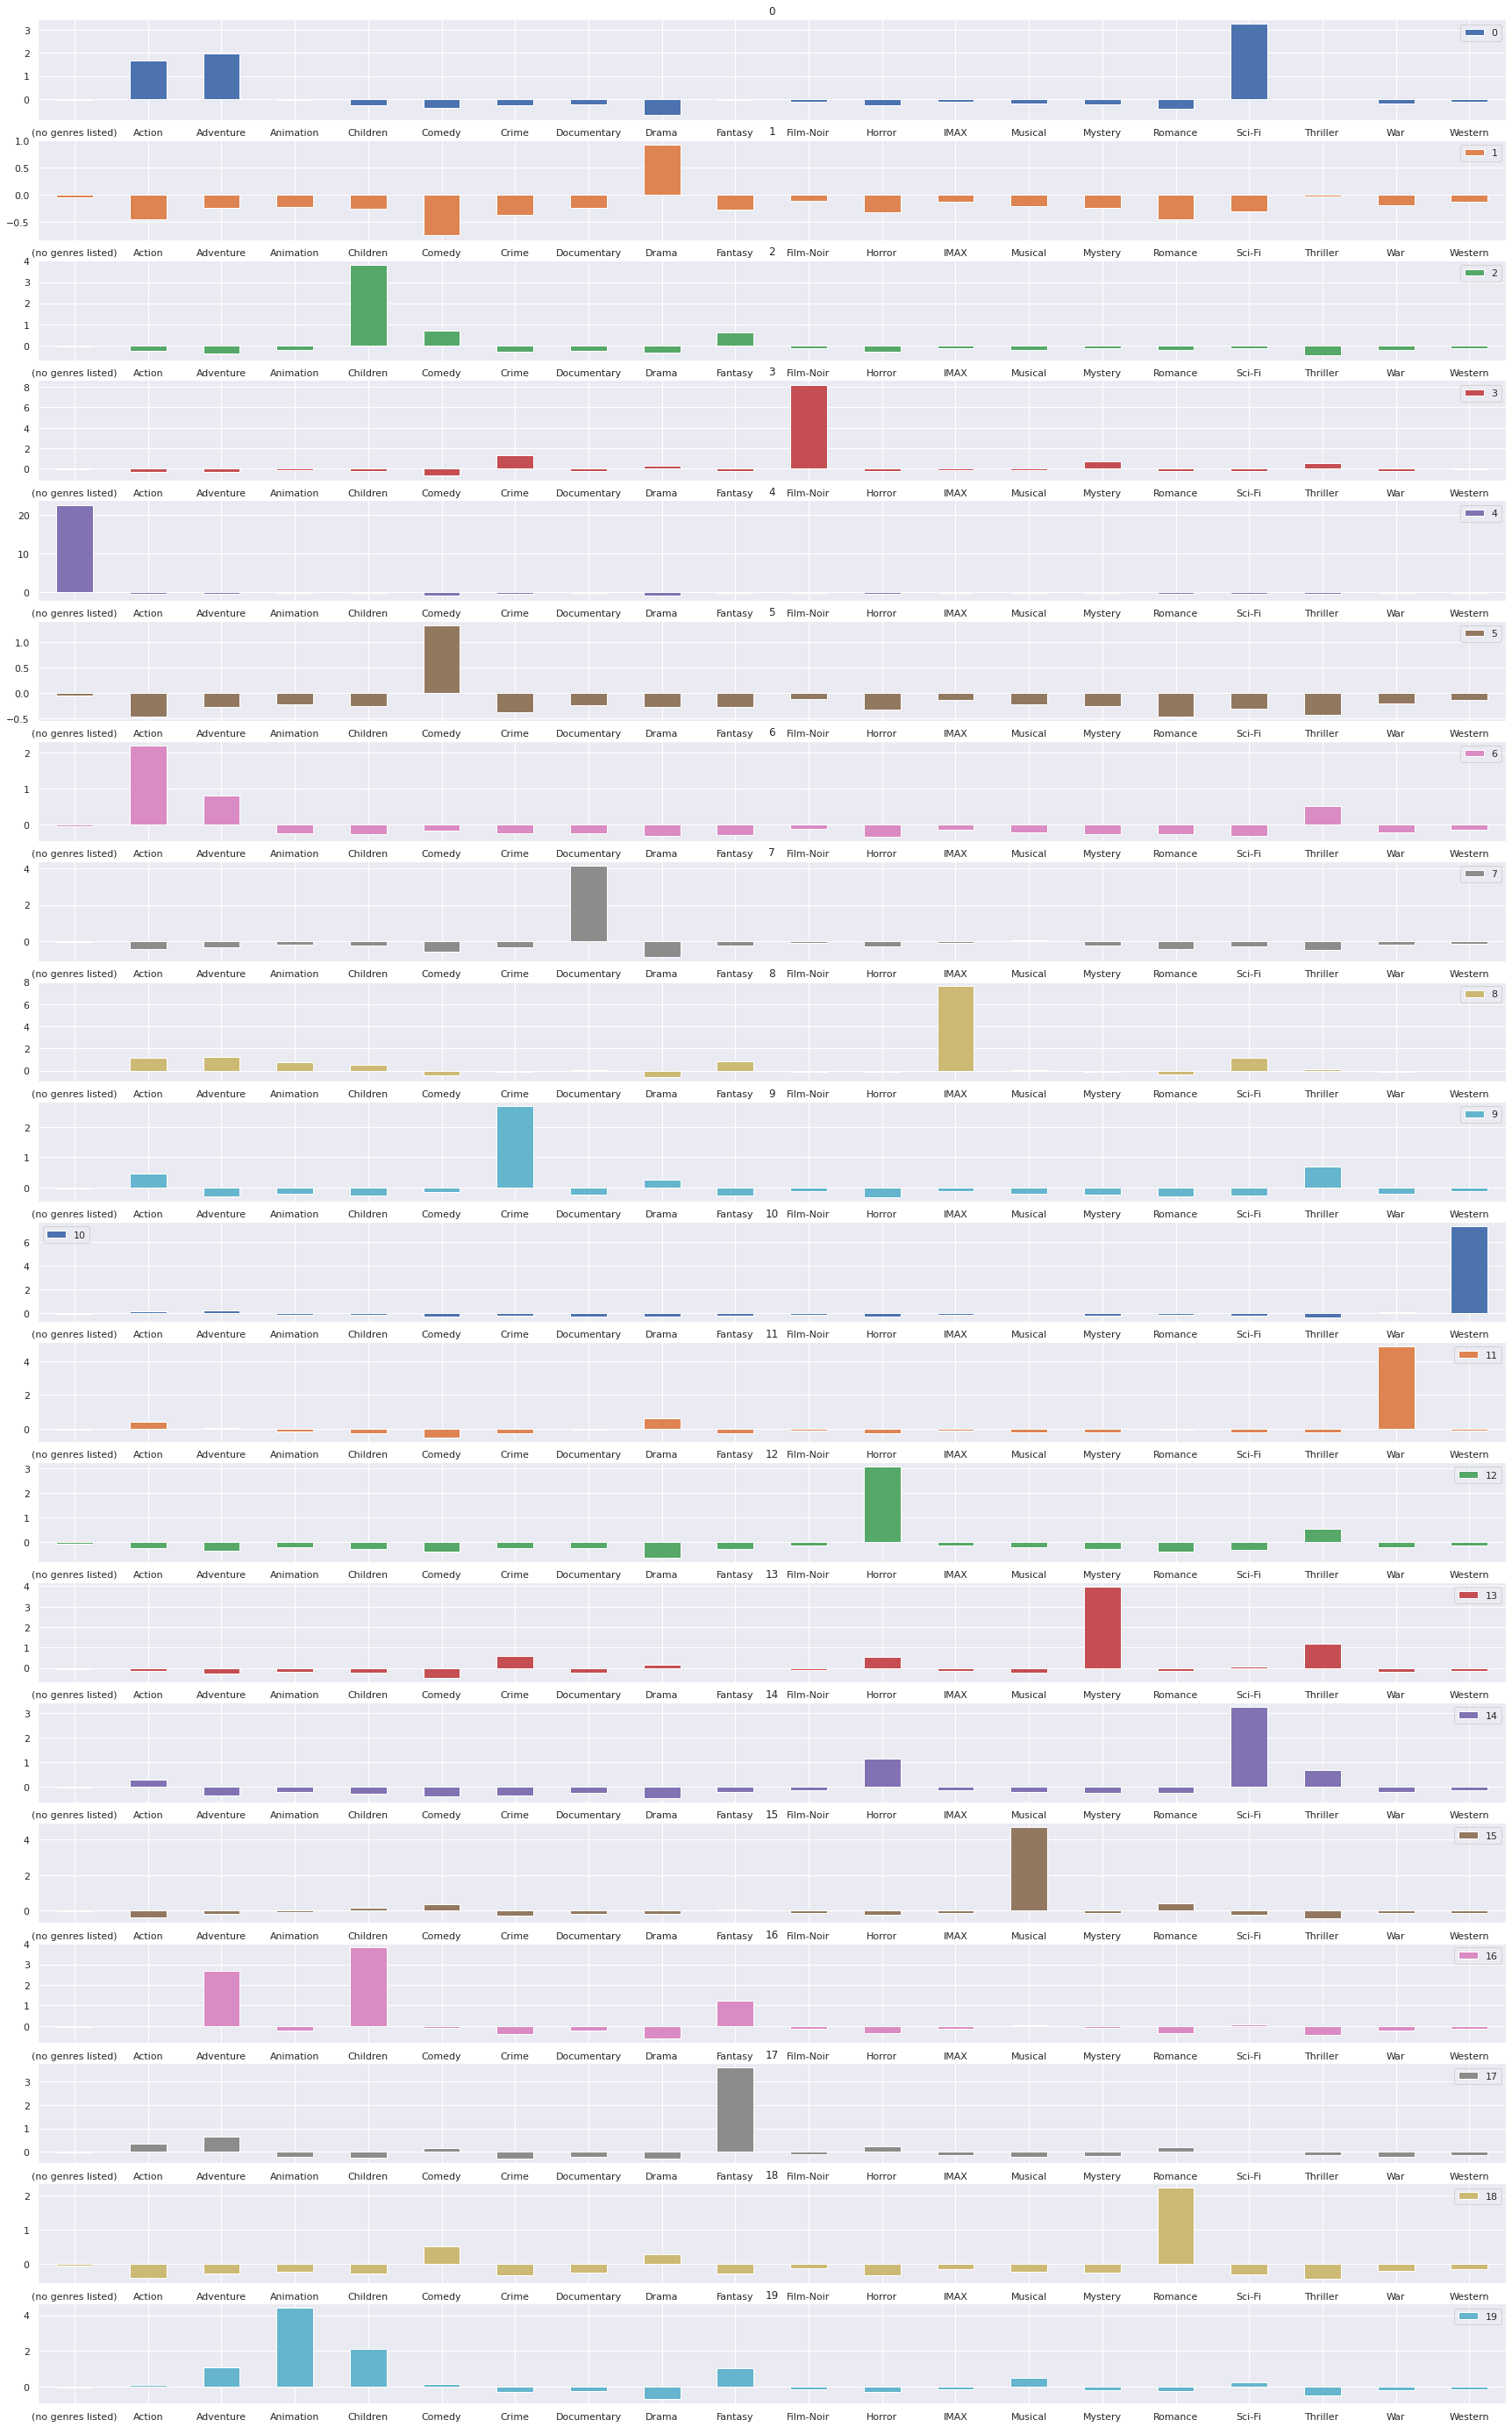

In [ ]:
grupos.transpose().plot.bar(subplots=True, 
                figsize=(30,50), 
                sharex=False,
                rot=0)

In [ ]:
grupo = 2
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3939,5092,Big Fat Liar (2002),Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
816,1012,Old Yeller (1957),Children|Drama,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8792,122932,Elsa & Fred (2014),Children|Comedy|Romance,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
213,241,Fluke (1995),Children|Drama,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4590,6338,Daddy Day Care (2003),Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1595,2034,"Black Hole, The (1979)",Children|Sci-Fi,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
820,1016,"Shaggy Dog, The (1959)",Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3195,3991,102 Dalmatians (2000),Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1603,2042,D2: The Mighty Ducks (1994),Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
361,410,Addams Family Values (1993),Children|Comedy|Fantasy,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


**Quantos grupos escolher**

In [ ]:
def  kmeans(numero_de_cluster,generos):
  modelo = KMeans(n_clusters=numero_de_cluster)
  modelo.fit(generos)
  return [numero_de_cluster, modelo.inertia_]

In [ ]:
kmeans(20, generos_esclados)

[20, 51690.49749383335]

In [ ]:
kmeans(3, generos_esclados)

[3, 155177.3969973246]

**O método do cotovelo**

In [ ]:
resultado = [kmean(numero_de_grupos, generos_esclados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 182500.0],
 [2, 167768.01701176274],
 [3, 156980.41745470618],
 [4, 147322.22627109094],
 [5, 138675.53509399068],
 [6, 129208.04258747784],
 [7, 119848.50712494485],
 [8, 110990.071139606],
 [9, 103796.54459024787],
 [10, 94217.50669857116],
 [11, 87304.43792762897],
 [12, 82264.6377394099],
 [13, 77876.82621494001],
 [14, 69327.28626840796],
 [15, 63727.59649242113],
 [16, 60809.087004401554],
 [17, 57068.9776387429],
 [18, 56115.744660728255],
 [19, 54802.60154906595],
 [20, 51792.0621733369],
 [21, 50528.615246773246],
 [22, 49213.92872755294],
 [23, 47180.66573649888],
 [24, 45760.86598134109],
 [25, 45626.097924081536],
 [26, 44342.868658798405],
 [27, 43661.99605734],
 [28, 42545.56440345238],
 [29, 41591.14358687839],
 [30, 40364.16931037933],
 [31, 39579.88425488112],
 [32, 39187.52149709196],
 [33, 38038.436671095085],
 [34, 37126.69904258424],
 [35, 36293.78238768324],
 [36, 36102.233526505814],
 [37, 35679.41699724198],
 [38, 34828.90708499309],
 [39, 33947.86741480327

In [ ]:
resultado = pd.DataFrame(resultado, columns=["grupos", "inertia"])
resultado

,grupos,inertia
0,1,182500.000000
1,2,167768.017012
2,3,156980.417455
3,4,147322.226271
4,5,138675.535094
5,6,129208.042587
6,7,119848.507125
7,8,110990.071140
8,9,103796.544590
9,10,94217.506699


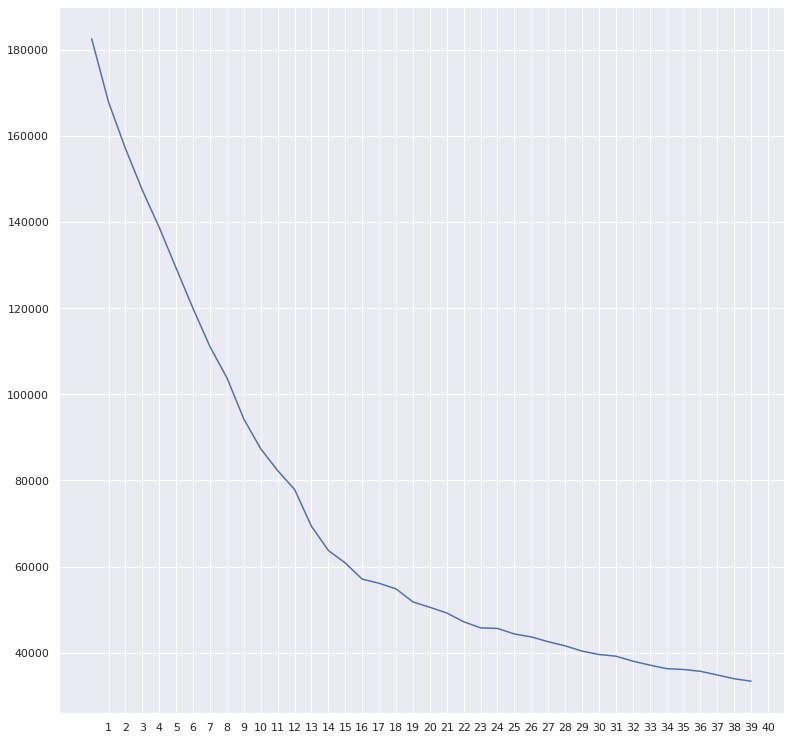

In [ ]:
resultado["inertia"].plot(xticks=resultado["grupos"])

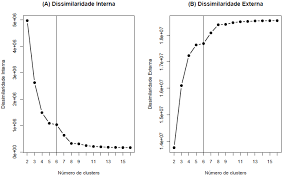

In [ ]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_esclados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=17, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.044458,-0.308659,-0.289623,-0.226957,-0.261249,1.323873,-0.370232,-0.239495,-0.304425,-0.163110,-0.121618,-0.326081,-0.130587,-0.212430,-0.251539,-0.451471,-0.308292,-0.429555,-0.204706,-0.136954
1,-0.044458,0.147965,1.132320,4.406117,2.052690,0.152626,-0.282936,-0.239495,-0.688624,0.994384,-0.121618,-0.273479,-0.130587,0.474062,-0.164158,-0.230989,0.315827,-0.457128,-0.165250,-0.136954
2,-0.044458,-0.433454,-0.332248,-0.206087,-0.242830,-0.568041,-0.328729,4.175445,-0.862927,-0.269126,-0.121618,-0.280232,-0.130587,-0.212430,-0.242019,-0.451471,-0.292292,-0.477756,-0.204706,-0.136954
3,-0.044458,0.463665,-0.320095,-0.220722,-0.261249,-0.150899,2.701010,-0.239495,0.244055,-0.246550,-0.121618,-0.316948,-0.130587,-0.212430,-0.251539,-0.297154,-0.293950,0.677317,-0.204706,-0.136954
4,-0.044458,-0.212112,-0.340612,-0.218639,-0.261249,-0.363404,-0.221357,-0.239495,-0.608989,0.021431,-0.121618,3.066723,-0.130587,-0.212430,-0.251539,-0.365302,-0.308292,0.561017,-0.204706,-0.136954


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fadae171e90>,
      dtype=object)

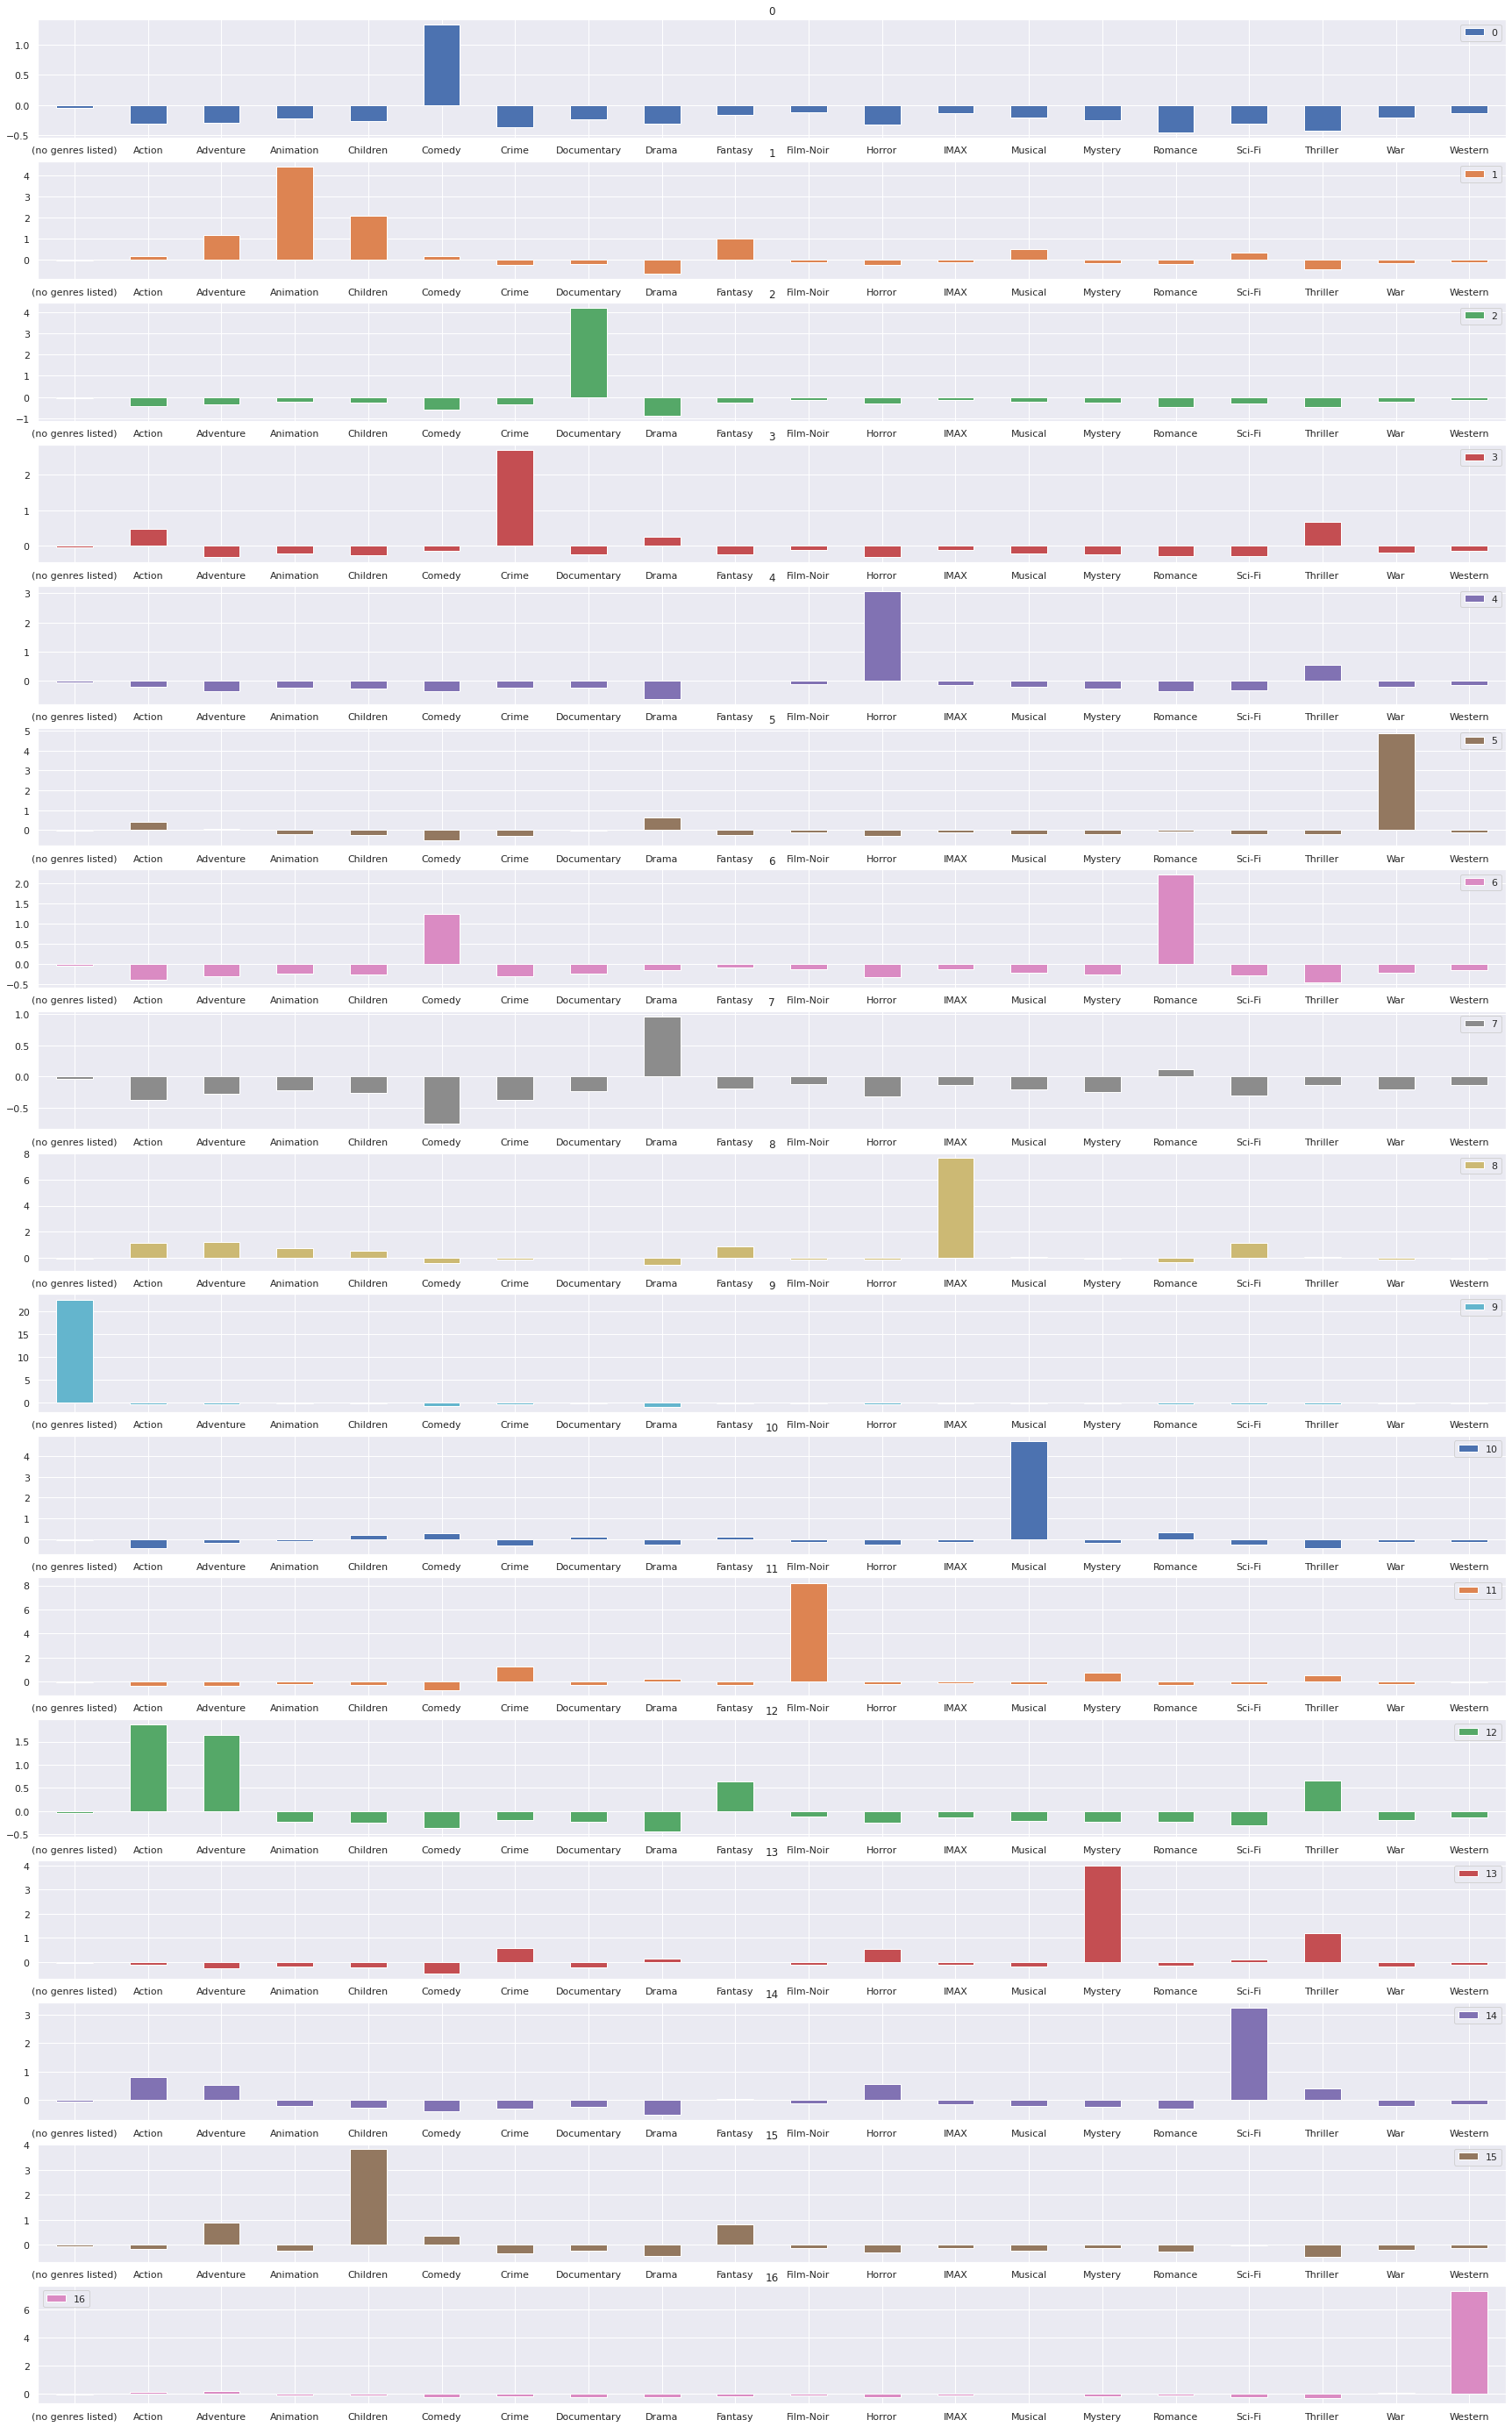

In [ ]:
grupos.transpose().plot.bar(subplots=True, 
                figsize=(30,50), 
                sharex=False,
                rot=0)

In [ ]:
grupo = 1
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7053,62336,FLCL (2000),Animation|Comedy|Fantasy|Sci-Fi,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2051,2559,"King and I, The (1999)",Animation|Children,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7800,86721,Idiots and Angels (2008),Animation|Drama|Fantasy,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
8618,112460,Planes: Fire & Rescue (2014),Adventure|Animation|Comedy,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7377,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8288,101142,"Croods, The (2013)",Adventure|Animation|Comedy,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6100,32562,Harvie Krumpet (2003),Animation|Comedy|Drama,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3880,5003,"Nine Lives of Fritz the Cat, The (1974)",Animation,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7985,92210,"Disappearance of Haruhi Suzumiya, The (Suzumiy...",Adventure|Animation|Drama|Mystery|Sci-Fi,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
5318,8015,"Phantom Tollbooth, The (1970)",Adventure|Animation|Children|Fantasy,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# **05. Agrupamento hierárquico**

**Conhecendo o agrupamento hierárquico**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_esclados)
grupos

array([12,  7,  6, ..., 15,  3, 15])

In [ ]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_esclados)
visualizacao

array([[-57.452656 ,  13.968843 ],
       [-27.65352  ,  57.553837 ],
       [-24.464167 , -13.100574 ],
       ...,
       [ 36.248104 , -18.882826 ],
       [  4.3989487, -30.295877 ],
       [ 34.14693  , -20.07725  ]], dtype=float32)

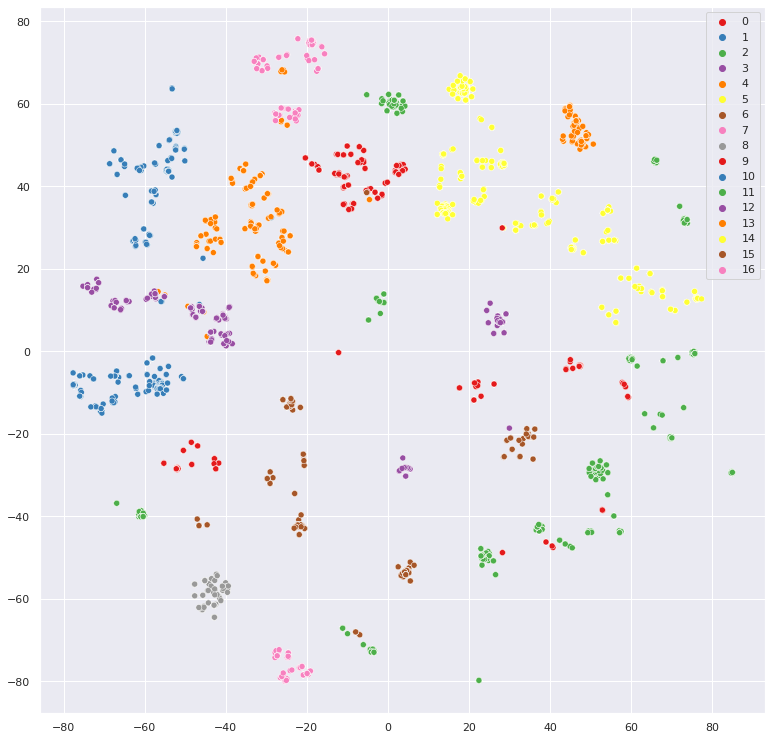

In [ ]:
sns.scatterplot(x=visualizacao[:,0],
                y=visualizacao[:,1],
                hue=grupos,
                palette=sns.color_palette("Set1", 17))

**Plotando um dendrograma**

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fadad1e3590>,
      dtype=object)

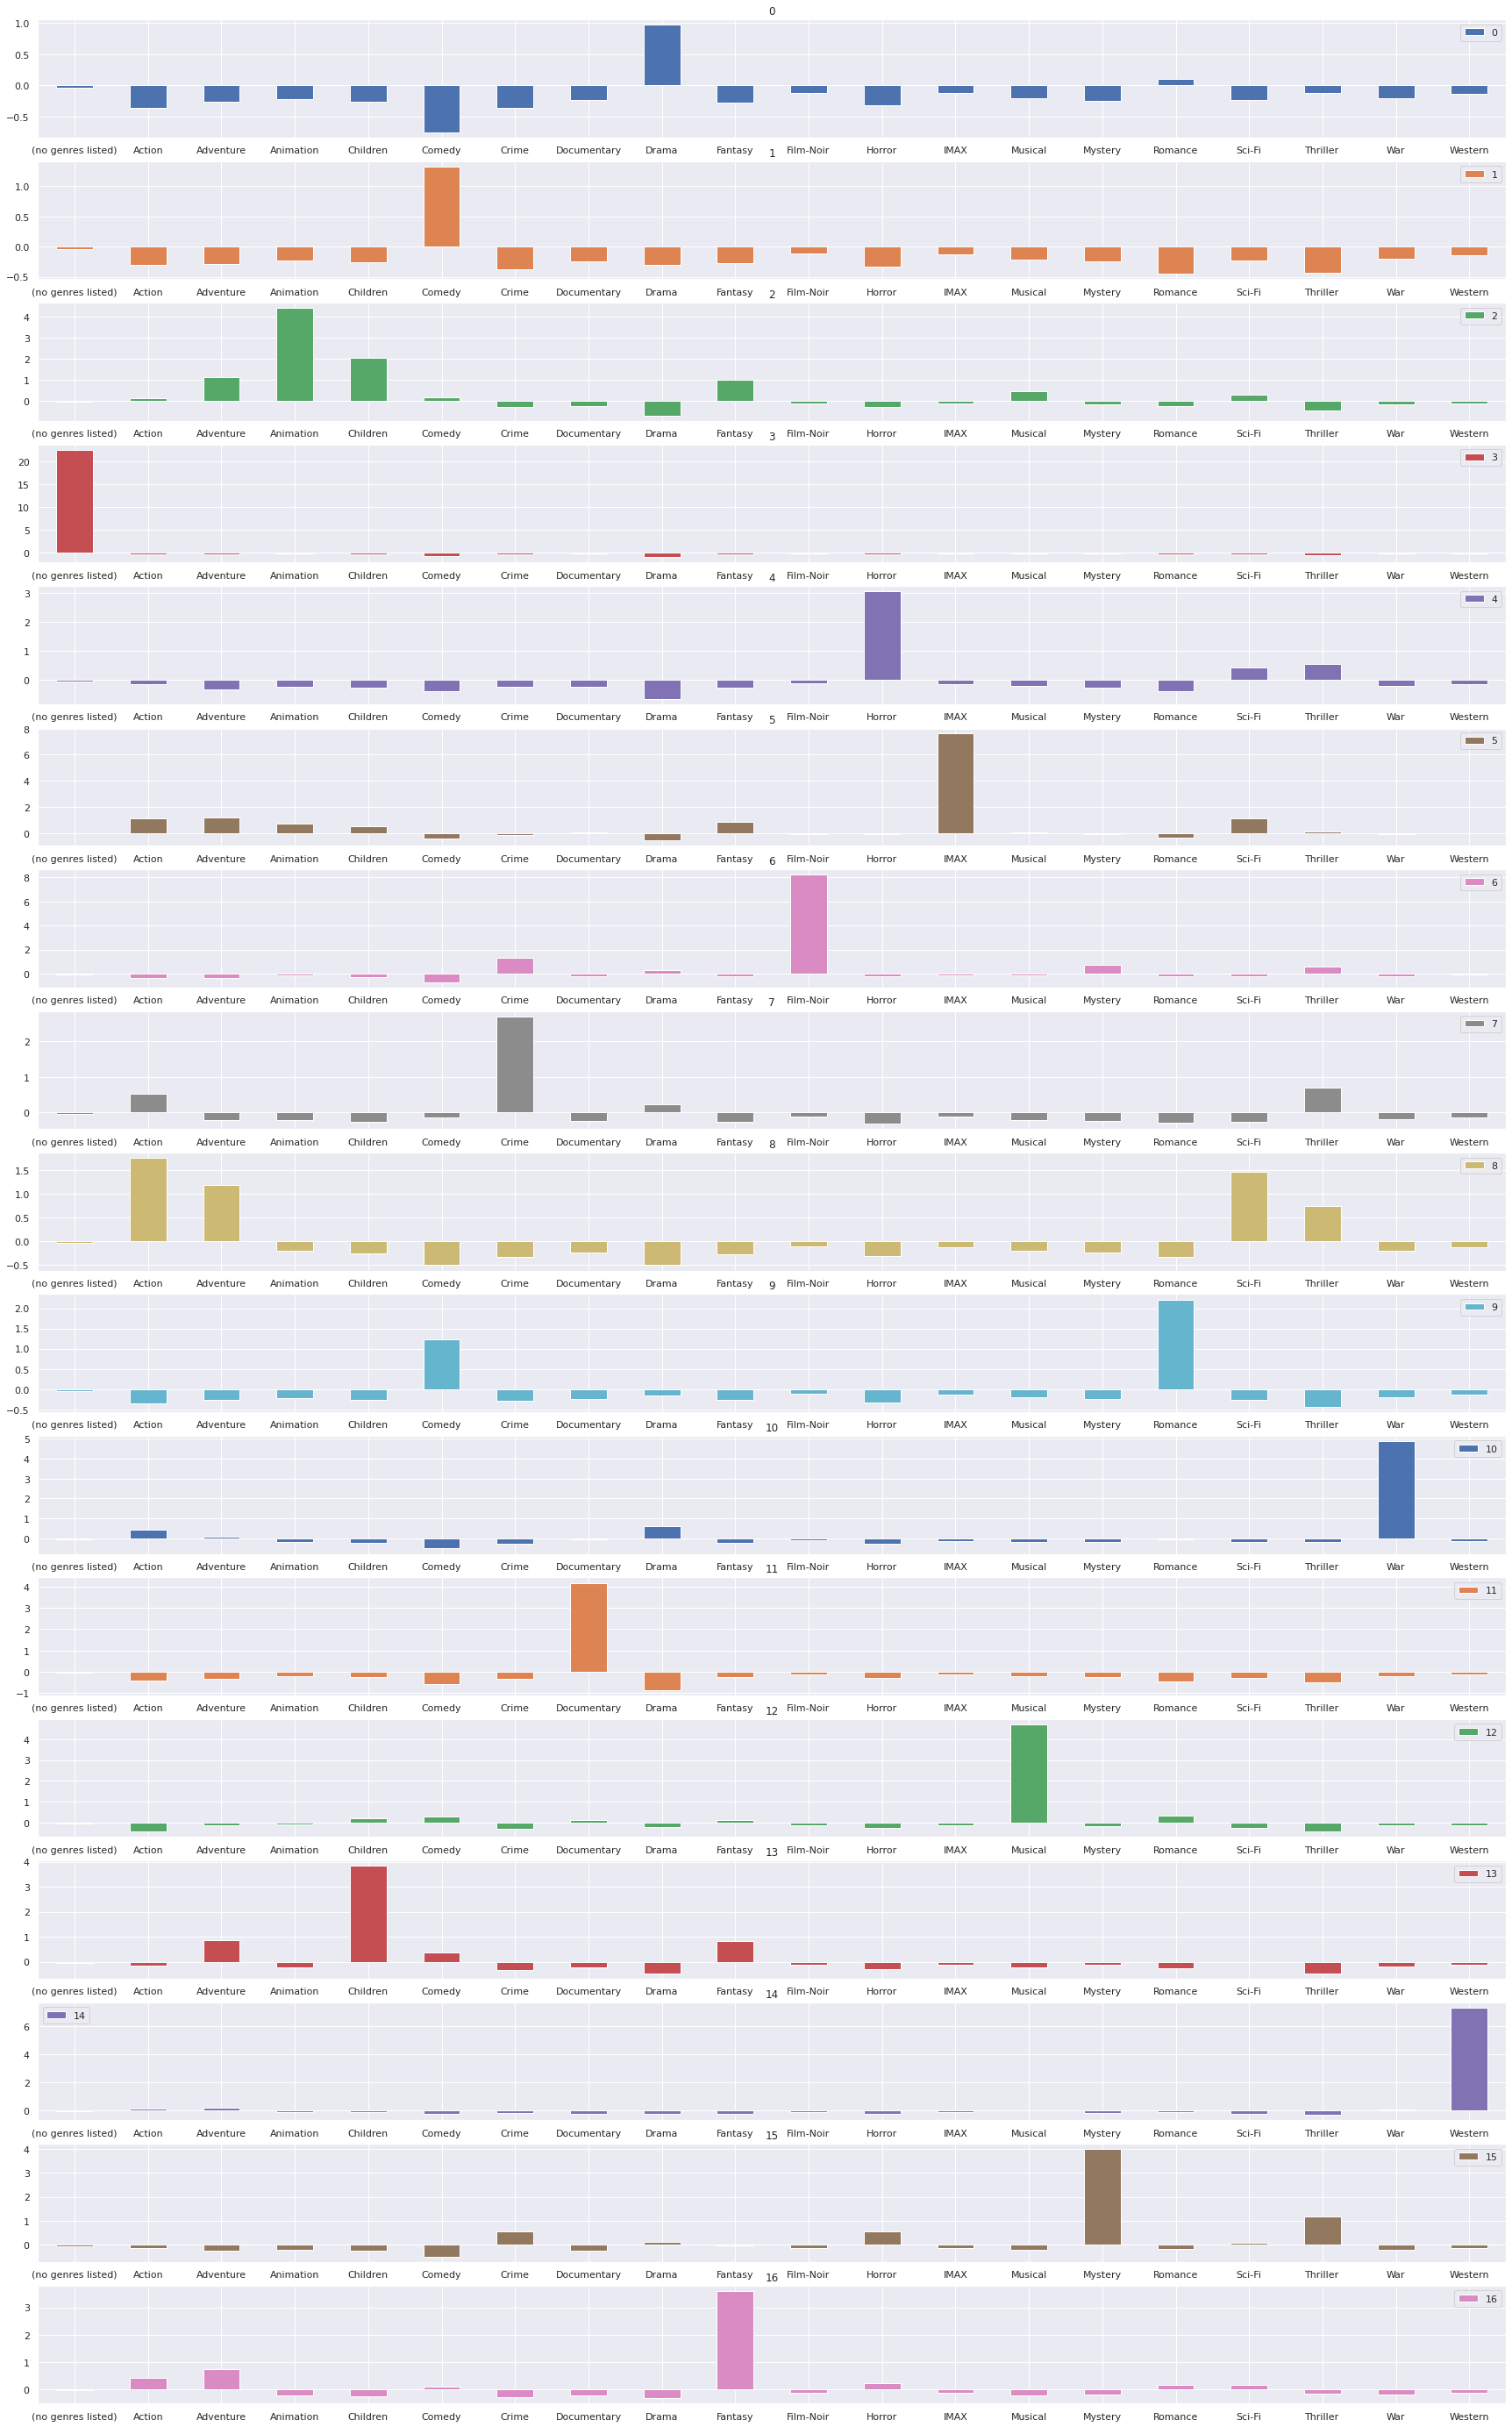

In [ ]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_esclados)

grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.head()

grupos.transpose().plot.bar(subplots=True, 
                figsize=(30,50), 
                sharex=False,
                rot=0)

In [ ]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 0.        ,  1.        ,  2.52220878,  2.        ],
       [ 9.        , 17.        ,  2.67380911,  3.        ],
       [ 7.        , 18.        ,  3.46120444,  4.        ],
       [ 8.        , 19.        ,  3.56056898,  5.        ],
       [ 4.        , 20.        ,  3.93917825,  6.        ],
       [16.        , 21.        ,  4.35917233,  7.        ],
       [13.        , 22.        ,  4.50450543,  8.        ],
       [15.        , 23.        ,  4.72335626,  9.        ],
       [11.        , 24.        ,  4.82996519, 10.        ],
       [ 2.        , 25.        ,  5.04762006, 11.        ],
       [12.        , 26.        ,  5.14230894, 12.        ],
       [10.        , 27.        ,  5.18660624, 13.        ],
       [14.        , 28.        ,  7.61084658, 14.        ],
       [ 5.        , 29.        ,  8.03909222, 15.        ],
       [ 6.        , 30.        ,  8.58173455, 16.        ],
       [ 3.        , 31.        , 22.62996199, 17.        ]])

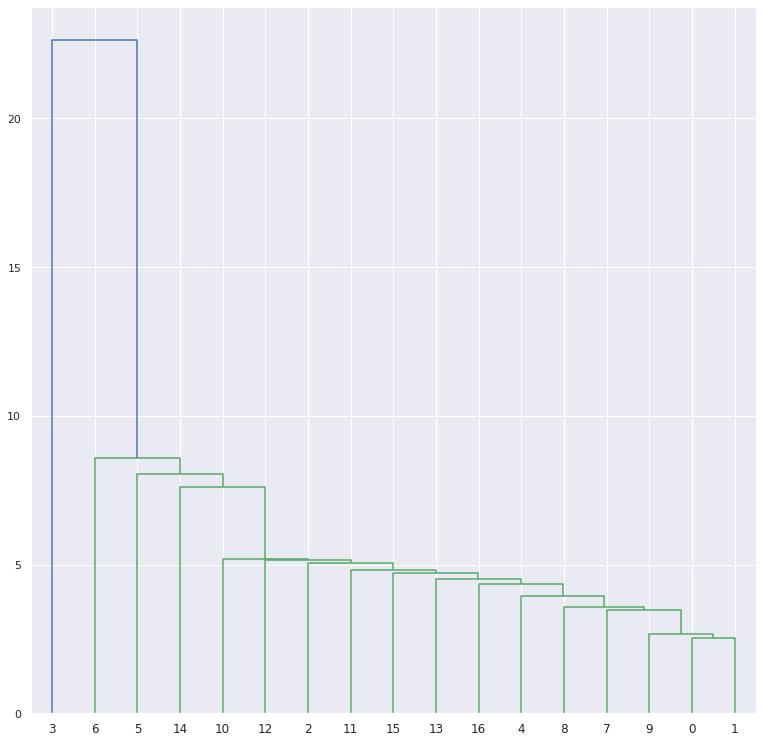

In [ ]:
dendograma = dendrogram(matriz_de_distancia)